# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Víctor Manuel Peris Montalt  <br>
Url: https://github.com/storstark3000/AO_Comb_p3/blob/main/AO_Entregable_P3_Comb.ipynb<br>
Problema:

>3. Combinar cifras y operaciones

Descripción del problema:

• El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva. 

• Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/) 

• Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo sería para obtener el 4: 4+2-6/3*1 = 4

Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:
- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?
- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?
Nota: Es posible usar la función de python “eval” para evaluar una expresión:

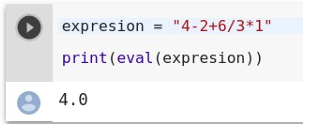

In [8]:
import itertools
import math
from itertools import permutations
from collections import defaultdict
import random

### ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?

### ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?

Para encontrar el máximo y el mínimo, así como todos los valores posibles entre el mínimo y el máximo, se diseñará un algoritmo que lo solucionará por fuerza bruta de la siguiente forma:

1. Se generarán las permutaciones de las cifras del 1 al 9 y de las distintas operaciones (+,−,∗,/)
2. Se alternarán las cifras y operaciones en las permutaciones que se van a generar y luego se evaluará cada expresión teniendo en cuenta la regla de la preferrencia de las operaciones
3. Se almacenarán los resultados de las evaluaciones y se determinarán los valores máximos y mínimos
4. Para finalizar, se comprobarán todas las combinaciones y confirmar que se encuentran todos los valores enteros entre 77 y -69. 

In [9]:
# Función para evaluar una expresión respetando la precedencia de operadores
def eval_expression(cifras, operaciones):
    expr = "".join(f"{c}{o}" for c, o in zip(cifras, operaciones)) + str(cifras[-1])
    try:
        return eval(expr)
    except ZeroDivisionError:
        return None  # Ignorar divisiones por cero

# Cifras y operaciones
cifras = [1, 2, 3, 4, 5, 6, 7, 8, 9]
operaciones = ['+', '-', '*', '/']

# Generar todas las permutaciones de las cifras
perm_cifras = list(permutations(cifras, 5))

# Generar todas las permutaciones de las operaciones
perm_operaciones = list(permutations(operaciones, 4))

# Almacenar valores posibles
valores_posibles = set()

# Evaluar todas las combinaciones posibles de cifras y operaciones
for p_cifras in perm_cifras:
    for p_operaciones in perm_operaciones:
        resultado = eval_expression(p_cifras, p_operaciones)
        if resultado is not None and resultado == int(resultado):  # Solo enteros
            valores_posibles.add(int(resultado))

# Encontrar el valor máximo y mínimo
if valores_posibles:
    valor_maximo = max(valores_posibles)
    valor_minimo = min(valores_posibles)
else:
    valor_maximo = valor_minimo = None

print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo)

# Se verifica si todos los valores enteros en el rango [-69, 77] están presentes
rango_valores = set(range(-69, 78))
valores_faltantes = rango_valores - valores_posibles

print("Cobertura completa:", valores_faltantes == set())  # Esto será True si no faltan valores
print("Valores posibles:", valores_posibles)
print("Valores faltantes:", valores_faltantes)

Valor máximo: 77
Valor mínimo: -69
Cobertura completa: True
Valores posibles: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -1, -9, -8, -7, -6, -5, -4, -3, -2, -10}
Valores faltantes: set()


Como se puede comprobar, sí es posible encontrar todos los valores posibles entre el mínimo y el máximo utilizando la función eval. 

### (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?

### ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

##### Se calcula cuántas combinaciones posibles hay sin tener en cuenta ninguna restricción:

Se tienen 9 cifras y 4 operadores.

Se pueden permutar las 9 cifras de 9! maneras.

Se pueden permutar los 4 operadores de 4! maneras.

Entonces, el número total de combinaciones sin restricciones es:

9!×4!= 8.709.120


In [10]:
# Se genera el código para el cálculo sin restricciones
permutaciones_cifras = math.factorial(9)
permutaciones_operaciones = math.factorial(4)
posibilidades_sin_restricciones = permutaciones_cifras * permutaciones_operaciones
posibilidades_sin_restricciones

8709120

##### Se calcula cuántas combinaciones posibles hay teniendo en cuenta las restricciones (las cifras no se pueden repetir):

Esto se realizará directamente con código


In [11]:
# Se calcula el número de formas de seleccionar 5 cifras de 9
combinaciones_cifras = math.comb(9, 5)
# Se calcula el número de permutacines de estas 5 cifras
permutaciones_cifras_restriccion = math.factorial(5)
# Se calcula el número de permutaciones de las 4 operaciones
permutaciones_operaciones_restriccion = math.factorial(4)
# Aquí el resultado de todas la prosibilidades con restricciones
posibilidades_con_restricciones = combinaciones_cifras * permutaciones_cifras_restriccion * permutaciones_operaciones_restriccion
posibilidades_con_restricciones

362880

#### Resultados:
Posibilidades sin restricciones: 8.709.120

Posibilidades con restricciones: 362.880

### Modelo para el espacio de soluciones
### (*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo)

En este caso se han utilizado dos estructuras de datos distintas: Lista (list) y Conjunto (set).

Se han utilizado la listas para almacenar las cifras, las operaciones y generar las permutaciones. Por otro lado, se han utilizado los conjuntos para almacenar los valores posibles y verificar rápidamente la presencia de todos los valores enteros de un rango

Las listas han sido adecuadas para generar y manejar permutaciones de cifras y operaciones. La función "permutations" de itertools requiere listas o iterables y devuelve un iterador de tuplas, lo cual es eficiente y sencillo de manejar. 

El uso de los conjuntos es ventajoso porque necesitamos verificar rápidamente la presencia de todos los valores enteros en un rango específico. Los conjuntos permiten operaciones de pertenencia en tiempo constante promedio, lo que es muy importante cuando se trabaja con grandes cantidades de datos. Es la mejor opción para el almacenamiento y verificación de datos, para la eliminicación automática de duplicados y para la realización de operaciones conjuntas.


### Según el modelo para el espacio de soluciones
### (*)¿Cual es la función objetivo?

### (*)¿Es un problema de maximización o minimización?

En el contexto de este ejercicio, donde se está analizando todas las combinaciones de cifras y operaciones para obtener un rango de valores, habrá distintas formas de interpretar la función objetivo. Por un lado, se intenta maximizar el resultados de las expresiones calculadas por las cifras y operaciones, y por otro lado, justo lo contrario, minimizar el resultado de la expresiones calculadas por las cifras y operaciones. 

Esta situación hace que el problema se pueda considerar tanto de maximización (encontrar el valor máximo de las combinaciones), como de minimación (encontrar el valor mínimo de las operaciones), siendo ambas su función objetivo.

Respecto a la parte de encontrar todos los valores enteros posibles entre un mínimo y un máximo, la función objetivo se redefine como una función de cobertura, su función objetivo para a convertise en comprobar si todos los valores enteros en el intervalo [−69,77] pueden ser generados usando las combinaciones permitidas de cifras y operaciones.



### Diseña un algoritmo para resolver el problema por fuerza bruta

El algoritmo ha sido resuelto por fuerza bruta al principio del trabajo para contestar a las preguntas del enunciado

### Calcula la complejidad del algoritmo por fuerza bruta

#### Vamos a analizar cada parte del código en detalle para determinar su contribución a la complejidad total ))





In [ ]:
# perm_cifras = list(permutations(cifras, 5))

La función permutations de itertools genera todas las permutaciones posibles de longitud 5 a partir de una lista de 9 elementos. La complejidad de generar estas permutaciones es O(P(9,5))=O(9!)

In [ ]:
# perm_operaciones = list(permutations(operaciones, 4))

Aquí, permutations genera todas las permutaciones posibles de longitud 4 a partir de una lista de 4 elementos, la complejidad de generar estas permutaciones es O(4!) 

In [ ]:
# for p_cifras in perm_cifras:
    # for p_operaciones in perm_operaciones:
        # resultado = eval_expression(p_cifras, p_operaciones)
        # if resultado is not None and resultado == int(resultado):  # Solo enteros
            # valores_posibles.add(int(resultado))

Aquí tenemos dos bucles anidados:

El primer bucle itera sobre todas las permutaciones de cifras (𝑃(9,5)) elementos.
El segundo bucle itera sobre todas las permutaciones de operaciones (4! elementos).

Por lo tanto, la complejidad combinada de estos bucles es O(P(9,5)×4!)=O(9!/4!×4!)=O(9!).

Dentro de los bucles, la llamada a eval_expression se ejecuta en tiempo constante O(1) porque la expresión tiene una longitud fija.

In [ ]:
#def eval_expression(cifras, operaciones):
    # expr = "".join(f"{c}{o}" for c, o in zip(cifras, operaciones)) + str(cifras[-1])
    # try:
        # return eval(expr)
    # except ZeroDivisionError:
        # return None  # Ignorar divisiones por cero

Esta función realiza operaciones en tiempo constante O(1), ya que siempre maneja una expresión de longitud fija.

In [ ]:
# if valores_posibles:
    # valor_maximo = max(valores_posibles)
    # valor_minimo = min(valores_posibles)
# else:
    # valor_maximo = valor_minimo = None

Encontrar el valor máximo y mínimo en un conjunto tiene una complejidad lineal O(n), donde 𝑛 es el número de elementos en valores_posibles.

In [ ]:
# rango_valores = set(range(-69, 78))
# valores_faltantes = rango_valores - valores_posibles

# print("Cobertura completa:", valores_faltantes == set())  # Esto será True si no faltan valores

Verificar si todos los valores en un rango están presentes tiene una complejidad lineal O(n), donde 𝑛 es el tamaño del rango.

#### Obedeciendo a la parte más dominante del algorirmo, se puede concluir que la complejidad del algoritmo será factorial O(9!)

### (*)Diseña un algoritmo que mejore la complejidad del algoritmo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Se desarrollará un algoritmo de programación dinámica para mejorar la complejidad del algoritmo con el fin de evitar recalcular resultados ya conocidos y reducir la cantidad de evalucianos necesarias

In [12]:
# Función para encontrar todos los valores posibles y calcular el máximo y mínimo
def find_max_min_and_all_values():
    cifras = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    operaciones = ['+', '-', '*', '/']
    
    # Generar todas las permutaciones de las cifras
    perm_cifras = list(permutations(cifras, 5))
    
    # Generar todas las permutaciones de las operaciones
    perm_operaciones = list(permutations(operaciones, 4))
    
    # Diccionario para almacenar los resultados parciales
    resultados = defaultdict(set)
    
    # Evaluar todas las combinaciones posibles de cifras y operaciones
    for p_cifras in perm_cifras:
        for p_operaciones in perm_operaciones:
            resultado = eval_expression(p_cifras, p_operaciones)
            if resultado is not None and resultado.is_integer():  # Solo enteros
                resultados[p_cifras].add(int(resultado))
    
    # Unir todos los resultados en un conjunto
    valores_posibles = set()
    for res in resultados.values():
        valores_posibles.update(res)
    
    # Encontrar el valor máximo y mínimo
    valor_maximo = max(valores_posibles)
    valor_minimo = min(valores_posibles)
    
    return valor_maximo, valor_minimo, valores_posibles

# Ejecución del Algoritmo
valor_maximo, valor_minimo, valores_posibles = find_max_min_and_all_values()
rango_valores = set(range(-69, 78))
valores_faltantes = rango_valores - valores_posibles

print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo)
print("Cobertura completa:", valores_faltantes == set())  # Esto será True si no faltan valores
print("Valores posibles:", valores_posibles)
print("Valores faltantes:", valores_faltantes)

Valor máximo: 77
Valor mínimo: -69
Cobertura completa: True
Valores posibles: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -1, -9, -8, -7, -6, -5, -4, -3, -2, -10}
Valores faltantes: set()


Con este algoritmo se han almacenado los resultados de las evaluaciones parciales en un diccionario, lo que evita recalcular las mismas subexpresiones múltiples veces, además, al almacenar en un diccionario se reducirá el uso de memoria en comparación con el algoritmo de fuerza bruta permitiendo un acceso más rápido y eficiente de los datos. Aunque aún haya permutaciones, el hecho de que se reduzca la reutilización de resultados parciales reduce la cantidad de evaluaciones y mejora la complejidad temporal efectiva.

### (*)Calcula la complejidad del algoritmo

La complejidad del algoritmo dinámico desarrollado seguirá siendo factorial O(9!) ya que los dos algoritmos deben analizar todas las combinaciones posibles de cifras y operaciones. Hay que tener en cuenta que el algoritmo programación dinámica creado es mejor en términos de eficiencia debido a que reutiliza los resultados almacenados reduciendo la canditdad de evaluaciones redundantes, afectando esto directamente a la gestión de memoria y el tiempo de ejecución.

### Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios
### Aplica el algoritmo al juego de datos generado

Se puede diseñar un algoritmo en el que se generará un conjunto de cifras aleatorias (de tamaño entre 1 y 9) y un conjunto de operaciones aleatorias (con posibilidad de repetición), luego se evaluará todas las combinaciones posibles.

In [13]:
# Función para generar cifras y operaciones aleatorias
def generar_datos_aleatorios():
    # Generar un conjunto aleatorio de cifras de tamaño entre 1 y 9
    tamaño_cifras = random.randint(2, 9)
    cifras = random.sample(range(1, 10), tamaño_cifras)
    
    # Generar un conjunto aleatorio de operaciones (pueden repetirse)
    operaciones = [random.choice(['+', '-', '*', '/']) for _ in range(tamaño_cifras - 1)]
    
    return cifras, operaciones

In [14]:
# Función para evaluar todas las combinaciones posibles de cifras y operaciones
def evaluar_combinaciones(cifras, operaciones):
    resultados = set()
    
    # Generar todas las permutaciones de las cifras
    perm_cifras = permutations(cifras)
    
    # Generar todas las permutaciones de las operaciones
    perm_operaciones = permutations(operaciones)
    
    # Evaluar todas las combinaciones posibles de cifras y operaciones
    for p_cifras in perm_cifras:
        for p_operaciones in perm_operaciones:
            resultado = eval_expression(p_cifras, p_operaciones)
            if resultado is not None:  # Solo enteros
                resultados.add(int(resultado))
    
    return resultados

In [15]:
# Función principal para encontrar los valores máximo, mínimo y todos los posibles
def find_max_min_and_all_values():
    cifras, operaciones = generar_datos_aleatorios()
    
    # Se evaluan todas las combinaciones posibles de cifras y operaciones
    valores_posibles = evaluar_combinaciones(cifras, operaciones)
    
    if valores_posibles:
        # Encontrar el valor máximo y mínimo
        valor_maximo = max(valores_posibles)
        valor_minimo = min(valores_posibles)
    else:
        valor_maximo = valor_minimo = None
    
    return cifras, operaciones, valor_maximo, valor_minimo, valores_posibles

In [16]:
# Función para ejecutar múltiples evaluaciones con datos aleatorios
def ejecutar_multiples_evaluaciones(n):
    for i in range(n):
        cifras, operaciones, valor_maximo, valor_minimo, valores_posibles = find_max_min_and_all_values()
        rango_valores = set(range(-69, 78))
        valores_faltantes = rango_valores - valores_posibles
        
        print(f"Evaluación {i + 1}:")
        print("Cifras aleatorias:", cifras)
        print("Operaciones aleatorias:", operaciones)
        print("Valor máximo:", valor_maximo)
        print("Valor mínimo:", valor_minimo)
        print("Cobertura completa:", valores_faltantes == set())  # Esto será True si no faltan valores
        print("Valores posibles:", valores_posibles)
        print("Valores faltantes:", valores_faltantes)
        print()

# Se ejecuta el algoritmo con múltiples conjuntos de datos aleatorios
numero_de_evaluaciones = 5  # Se definen 5 número de evaluaciones con posibilidad de ser modificado al gusto del usuario
ejecutar_multiples_evaluaciones(numero_de_evaluaciones)


Evaluación 1:
Cifras aleatorias: [3, 9, 5, 4, 2, 6, 8, 7]
Operaciones aleatorias: ['/', '+', '+', '/', '*', '/', '-']
Valor máximo: 67
Valor mínimo: -54
Cobertura completa: False
Valores posibles: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 64, 67, -54, -52, -51, -50, -49, -47, -46, -43, -40, -39, -38, -37, -34, -18, -17, -12, -2, -9, -7, -6, -5, -4, -3, -1}
Valores faltantes: {36, 37, 39, 40, -64, 42, 45, 56, -69, -68, -67, 62, 63, -66, 65, 66, -65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, -62, -61, -57, -56, -55, -60, -63, -48, -45, -44, -59, -42, -41, -36, -58, -35, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -16, -15, -14, -13, -11, -53, -10, -8}

Evaluación 2:
Cifras aleatorias: [1, 6, 7]
Operaciones aleatorias: ['+', '*']
Valor máximo: 43
Valor mínimo: 13
Cobertura completa: False
Valor

Este código generará diferentes resultados en cada ejecución debido a la variabilidad en el número de cifras y operaciones, así como a la posibilidad de repetición de operaciones, proporcionando una prueba más diversa y realista del algoritmo.

### Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Con el fin de consultar las funciones de python como permutations del módulo "intertools" o alguna otra función que se conocía pero no se sabía utilizar con destreza: https://www.python.org/

Para consultar la resolución de algoritmos y creación de funciones: https://stackoverflow.com/

Con el objetivo de contestar a las preguntas teóricas ha sido fundamental utilizar el material proporcionado de la asignatura 

### Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Sería interesante implementar algoritmos genéticos, algoritmos de recocido simulado o algoritmos de colonia de hormigas para explorar el espacio de soluciones de manera más eficiente, con ello, podríamos comparar el rendimiento de diferentes técnicas heurísticas y optimizar los parámetros para mejorar la eficiencia y la calidad de las soluciones.

Se podría aumentar la variabilidad del problema ampliando el conjunto de operaciones permitidas y con ello analizar cómo esto podría afectar a la complejidad del problema (por ejemplo el uso del exponencial). También se podría introducir restricciones adicionales, como por ejemplo la obligacion de que las multiplicaxiones y las divisiones se realicen antes que las sumas y las restas.

Algo que también puede ser interesante sería el uso de un problema inverso, donde se conoce el resultado y se tiene que buscar la combinación de cifras y operaciones que producen el resultado.